In [2]:
# PYTHON-14. Очистка данных
# 2. Знакомство с новыми данными: данные о квартирах от Сбера

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.expand_frame_repr', False)

sber_data = pd.read_csv('data/sber_data.csv')

In [3]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [4]:
print(sber_data[sber_data['life_sq'] == 0].shape)

(45, 61)


In [5]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [7]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape)

(37, 61)


In [8]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Result records: {cleaned.shape[0]}')

Result records: 30434


In [9]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [10]:
display(sber_data[sber_data['floor']>50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Text(0.5, 1.0, 'Full Square Boxplot')

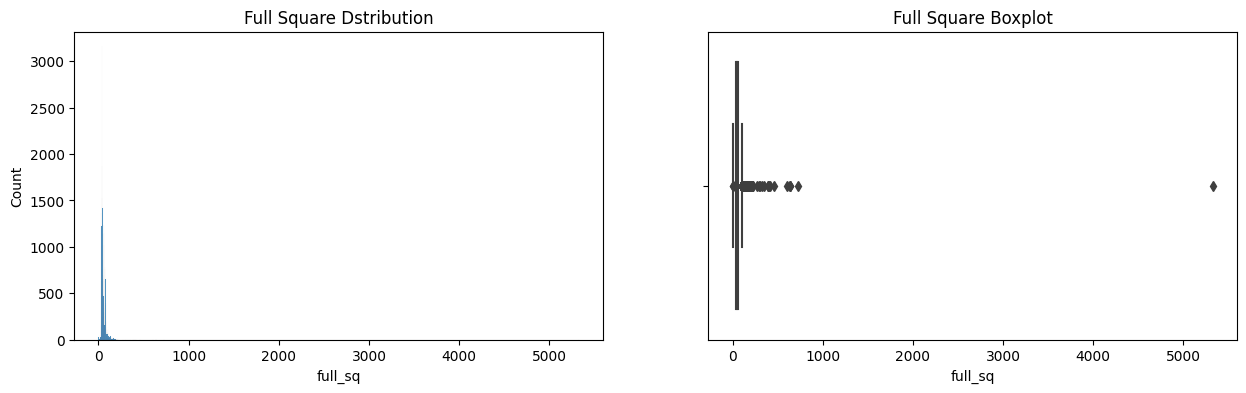

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Dstribution')
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1])
boxplot.set_title('Full Square Boxplot')

In [23]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - iqr * 1.5
    upper_bound = quartile_3 + iqr * 1.5
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Всего данных:{sber_data.shape[0]}')
print(f'Число выбросов по методу Тьюки:{outliers.shape[0]}')
print(f'Результируещее число записей:{cleaned.shape[0]}')

Всего данных:30471
Число выбросов по методу Тьюки:963
Результируещее число записей:29508


Text(0.5, 1.0, 'Cleanded Full Square Boxplot')

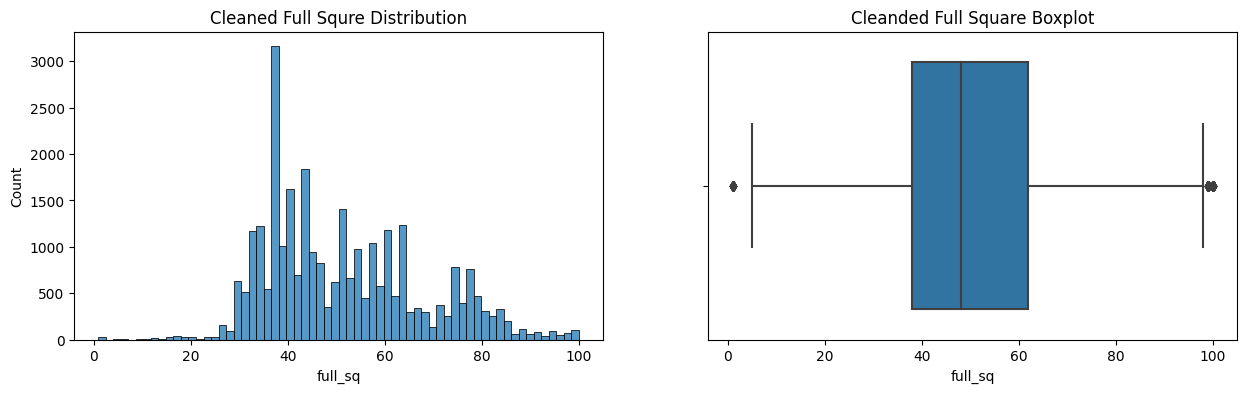

In [25]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0])
histplot.set_title('Cleaned Full Squre Distribution')
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1])
boxplot.set_title('Cleanded Full Square Boxplot')

Всего данных:30471
Число выбросов по методу Тьюки:963
Результируещее число записей:29508
Всего данных:30471
Число выбросов по методу Тьюки:59
Результируещее число записей:30403


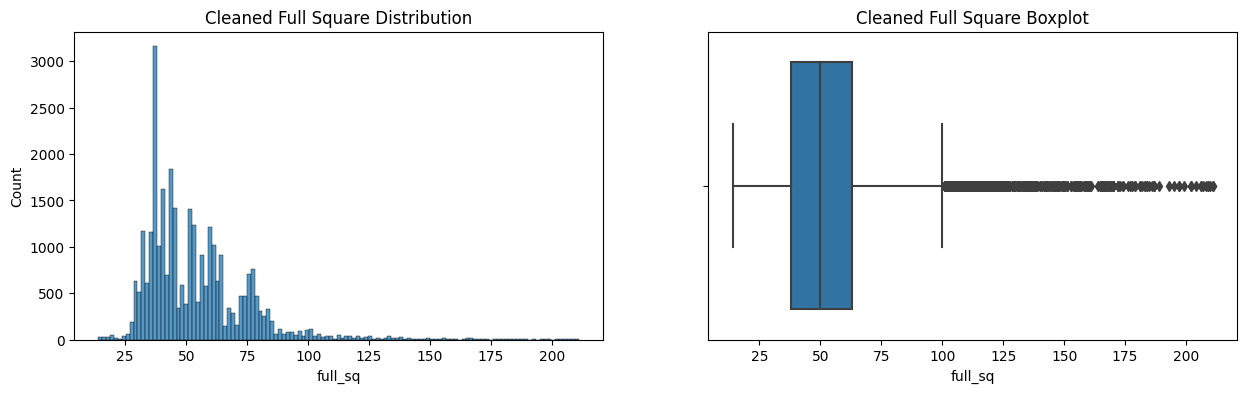

In [32]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - iqr * left
    upper_bound = quartile_3 + iqr * right
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Всего данных:{sber_data.shape[0]}')
print(f'Число выбросов по методу Тьюки:{outliers.shape[0]}')
print(f'Результируещее число записей:{cleaned.shape[0]}')

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', 1, 6)
print(f'Всего данных:{sber_data.shape[0]}')
print(f'Число выбросов по методу Тьюки:{outliers.shape[0]}')
print(f'Результируещее число записей:{cleaned.shape[0]}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');